# Compare Frictional Jetty to No Jetty
Other difference is light (biological in the base case, not in the jetty case)  
Ran two days, compare the second

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
base = nc.Dataset('/results/SalishSea/nowcast-green/16apr16/PointAtkinson.nc')
jetty = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/add_jetty/PointAtkinson.nc')
mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/add_jetty/bfr_coef.nc')

In [4]:
friction = mask.variables['bfr_coef'][:]

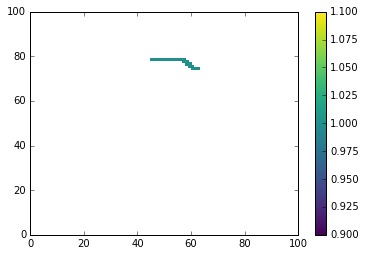

In [10]:
plt.pcolormesh(friction[350:450, 250:350], cmap='viridis')
plt.colorbar()

In [7]:
base_ssh = base.variables['sossheig'][:]
jetty_ssh = jetty.variables['sossheig'][:]
print (jetty_ssh.shape)

(288, 1, 1)


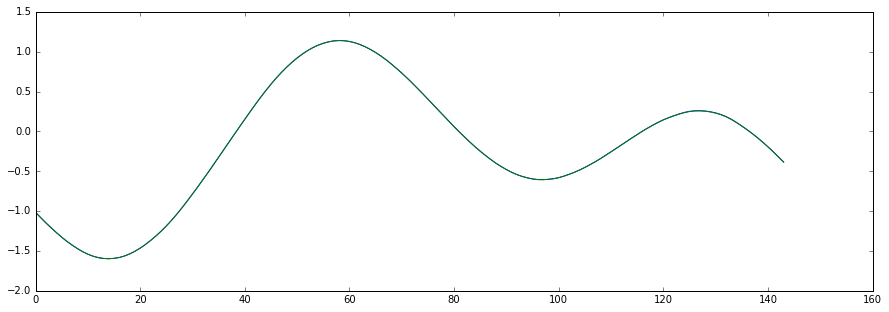

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(base_ssh[:, 0, 0])
ax.plot(jetty_ssh[144:, 0, 0])

In [11]:
base.close()
jetty.close()

In [13]:
base = nc.Dataset('/results/SalishSea/nowcast-green/16apr16/SalishSea_1h_20160416_20160416_grid_U.nc')
jetty = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/add_jetty/SalishSea_1h_20160415_20160416_grid_U.nc')
base_u = base.variables['vozocrtx'][:]
jetty_u = jetty.variables['vozocrtx'][24:]
base.close()
jetty.close()

In [14]:
base = nc.Dataset('/results/SalishSea/nowcast-green/16apr16/SalishSea_1h_20160416_20160416_grid_V.nc')
jetty = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/add_jetty/SalishSea_1h_20160415_20160416_grid_V.nc')
base_v = base.variables['vomecrty'][:]
jetty_v = jetty.variables['vomecrty'][24:]
base.close()
jetty.close()

In [16]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')
umask = mesh_mask.variables['umask'][:]
vmask = mesh_mask.variables['vmask'][:]
mesh_mask.close()

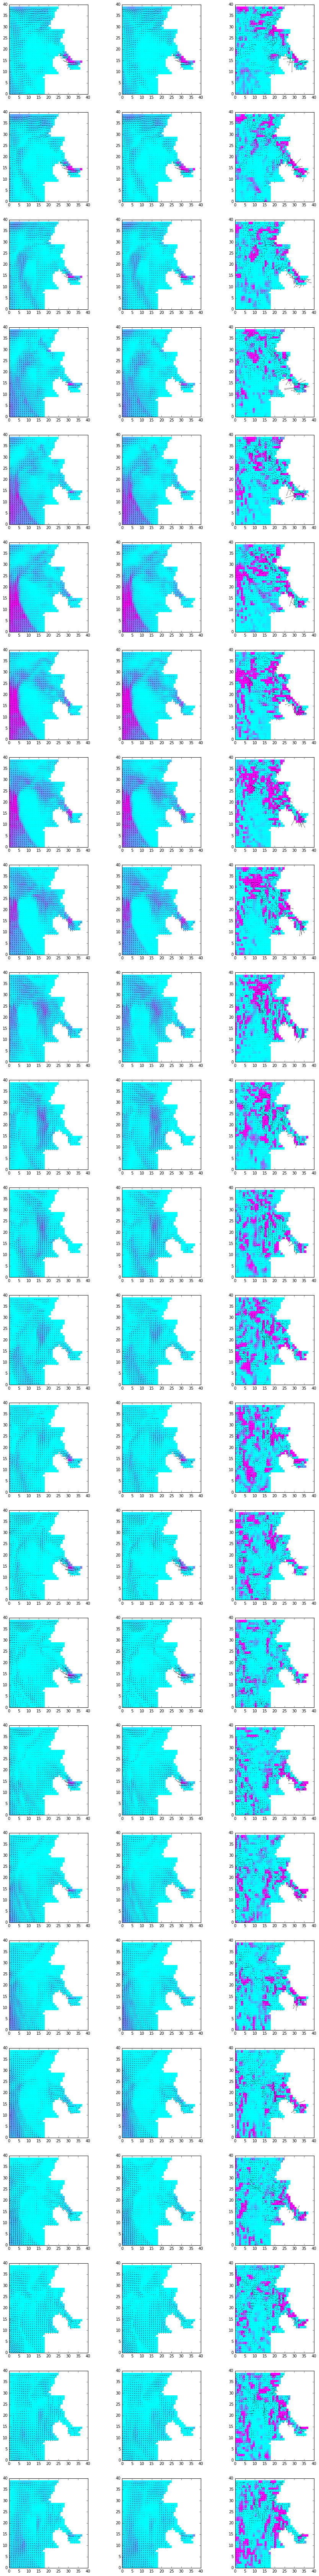

In [61]:
imin = 285; imax = 325; jmin = 400; jmax = 440; vmax = 0.5; depth = 4
fig, ax = plt.subplots(24, 3, figsize=(15, 24*5))
for t in range(0, 24):
    base_ut = np.ma.array(base_u[t, depth, jmin:jmax, imin:imax], mask=np.logical_not(umask[0, depth, jmin:jmax, imin:imax]))
    base_vt = np.ma.array(base_v[t, depth, jmin:jmax, imin:imax], mask=np.logical_not(vmask[0, depth, jmin:jmax, imin:imax]))
    jetty_ut = np.ma.array(jetty_u[t, depth, jmin:jmax, imin:imax], mask=np.logical_not(umask[0, depth, jmin:jmax, imin:imax]))
    jetty_vt = np.ma.array(jetty_v[t, depth, jmin:jmax, imin:imax], mask=np.logical_not(vmask[0, depth, jmin:jmax, imin:imax]))
    base_u_ustg, base_v_ustg = viz_tools.unstagger(base_ut, base_vt)
    jetty_u_ustg, jetty_v_ustg = viz_tools.unstagger(jetty_ut, jetty_vt)
    
    viz_tools.set_aspect(ax[t, 0])
    ax[t, 0].pcolormesh(base_v_ustg*base_v_ustg+base_u_ustg*base_u_ustg, cmap='cool', vmax=vmax, vmin=0)
    ax[t, 0].quiver(base_u_ustg, base_v_ustg)
    
    viz_tools.set_aspect(ax[t, 1])
    ax[t, 1].pcolormesh(jetty_v_ustg*jetty_v_ustg+jetty_u_ustg*jetty_u_ustg, cmap='cool', vmax=vmax, vmin=0)
    ax[t, 1].quiver(jetty_u_ustg, jetty_v_ustg)
    
    viz_tools.set_aspect(ax[t, 2])
    ax[t, 2].pcolormesh(jetty_v_ustg*jetty_v_ustg+jetty_u_ustg*jetty_u_ustg - 
                     (base_v_ustg*base_v_ustg+base_u_ustg*base_u_ustg), cmap='cool', vmax=vmax/100., vmin=0)
    ax[t, 2].quiver(jetty_u_ustg -base_u_ustg, jetty_v_ustg-base_v_ustg)

I did something wrong in the set-up.  No systematic difference at all.